In [125]:
import numpy as np
import matplotlib.pyplot as plt

## Συγγραφείς


 - Τσαμήτρος Νικόλαος με ΑΕΜ 10781
 - Νατσιόπουλος Αθανάσιος Χρήστος με ΑΕΜ 10688


## Μέρος Α


Στο μέρος Α της εργασίας ζητείται η ταξινόμηση κάποιων χρηστών, με βάση το εάν έχουν στρες(κλάση $\omega_2$) ή όχι(κλάση $\omega_1$), όταν παίζουν ένα βιντεοπαιχνίδι. Για να γίνει αυτό, έχουμε υπολογίσει τους δείκτες $x$ με συνάρτηση πυκνότητας πιθανότητας $p(x|\theta)= \frac{1}{\pi} \frac{1}{1+(x-\theta)^2}$ για 12 χρήστες. Έπειτα, γίνεται η ταξινόμηση με βάση την μέθοδο της μέγιστης πιθανοφάνειας και της συνάρτησης διάκρισης $$g(x)=\log P(x|\hat{\theta}_1) - \log P(x|\hat{\theta}_2) + \log P(\omega_1) - \log P(\omega_2)$$
Τα ερωτήματα υλοποιούνται μέσω της κλάσης *LogLikelihoodClassifier*, η οποία παρουσιάζεται αναλυτικά παρακάτω.

### Επεξήγηση της κλάσης *LogLikelihoodClassifier*


Η κλάση *LogLikelihoodClassifier* έχει ως σκοπό την υλοποίηση των παρακάτω:
- **Log-likelihood** των $D_1$ και $D_2$. Αυτή υπολογίζεται ως εξής όταν η κατανομή πυκνότητας πιθανότητας είναι η $p(x|\theta)=\frac{1}{\pi} \cdot \frac{1}{1+(x-\theta)^2}$: $$P(D|\theta) = \prod_{i=1}^np(x_i|\theta)\space \rightarrow \space \log P(D|\theta) = -n\log(\pi)-\sum_{i=1}^n\log(1 + (x_i-\theta)^2),\space n=length(D)$$
- **Fit**, η οποία επιστρέφει την *log-likelihood* ενός dataset για διάφορες τιμές της παραμέτρου θ καθώς και την τιμή του θ που την μεγιστοποιεί.
- **Prior Possibility**, η οποία επιστρέφει τις *a-priori* πιθανότητες των $D_1$ και $D_2$.
- **Predict**, η οποία υπολογίζει την συνάρτηση διάκρισης για κάθε παρατήρηση. Η συνάρτηση διάκρισης είναι η: $$g(x)=\log P(x|\hat{\theta}_1) - \log P(x|\hat{\theta}_2) + \log P(\omega_1) - \log P(\omega_2)$$

In [126]:
class LogLikelihoodClassifier:

  def __init__(self):
    pass

  def log_likelihood(self, D, theta):
    """
    @D: Given Dataset
    @theta: A theta value for which the function calculates the log likelihood
    @return: The log-likelihood for an entire given dataset with respect to theta
    """
    n = len(D)
    return -n * np.log(np.pi) - np.sum(np.log(1 + (D - theta)**2))

  def fit(self, D, theta_values):
    """
    @D: Given Dataset
    @theta_values: Matrix containing values of theta
    @return: The log-likelihood and the theta value that maximizes it
    """
    log_p_D = [self.log_likelihood(D, theta) for theta in theta_values]
    return log_p_D, theta_values[np.argmax(log_p_D)]

  def prior_possibility(self, D1, D2):
    """
    @D1: Dataset 1
    @D2: Dataset 2
    @return: The prior possibility of each class
    """
    prior1 = len(D1) / (len(D1) + len(D2))
    prior2 = len(D2) / (len(D1) + len(D2))
    return prior1, prior2

  def predict(self, x_values, prior1, prior2, theta1_hat, theta2_hat):
    """
    @x_values: Matrix containing values of x which is the concat of our initial D1 and D2
    @prior1: Prior possibility of class 1
    @prior2: Prior possibility of class 2
    @theta1_hat: Theta value that maximizes the log-likelihood for class 1
    @theta2_hat: Theta value that maximizes the log-likelihood for class 2
    @return: The values of the discriminant function g(x)
    Calculates the value of the discriminant function given the theta value that maximizes the log-likelihood of each class
    """
    log_p_x_given_theta1 = -np.log(np.pi) - np.log(1 + (x_values - theta1_hat)**2)
    log_p_x_given_theta2 = -np.log(np.pi) - np.log(1 + (x_values - theta2_hat)**2)

    g_x = log_p_x_given_theta1 - log_p_x_given_theta2 + np.log(prior1) - np.log(prior2)

    return g_x


### Ορισμός δεδομένων και εφαρμογή της συνάρτησης *fit*


Παρακάτω ορίζουμε τα δεδομένα των δεικτών $D_1$ και $D_2$ όπως δόθηκαν στην εκφώνηση. Οι δείκτες στο $D_1$ αντιπροσωπεύουν τους χρήστες χωρίς stress, ενώ στο $D_2$ τους χρήστες με stress. Επίσης ορίζουμε μια γκάμα τιμών της παραμέτρου θ, και υπολογίζουμε τις $\log P(D_1|\theta)$ και $\log P(D_2|\theta)$, καθώς και τα $\hat{\theta}_1$ και $\hat{\theta}_2$ τα οποία τις μεγιστοποιούν.

In [127]:
#Defining the datasets for the two classes
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])  # Class ω1 without stress
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3,])         # Class ω2 with stress

theta_values = np.linspace(-10, 10, 1000) # Defining possible theta_values

classifier = LogLikelihoodClassifier()

log_p_D1, theta1_hat = classifier.fit(D1, theta_values)
log_p_D2, theta2_hat = classifier.fit(D2, theta_values)

### Plots των $\log p(D_1|\theta)$ και $\log p(D_2|\theta)$


Παρακάτω γίνεται η απεικόνιση των $\log P(D_1|\theta)$ και $\log P(D_2|\theta)$ με βάση την τιμή της παραμέτρου θ. Στο διάγραμμα φαίνονται επίσης οι τιμές των $\hat{\theta}_1 = 2.59$ και $\hat{\theta}_2 = -3.15$. Αυτές μεγιστοποιούν τις $\log P(D_1|\theta)$ και $\log P(D_2|\theta)$ αντίστοιχα.

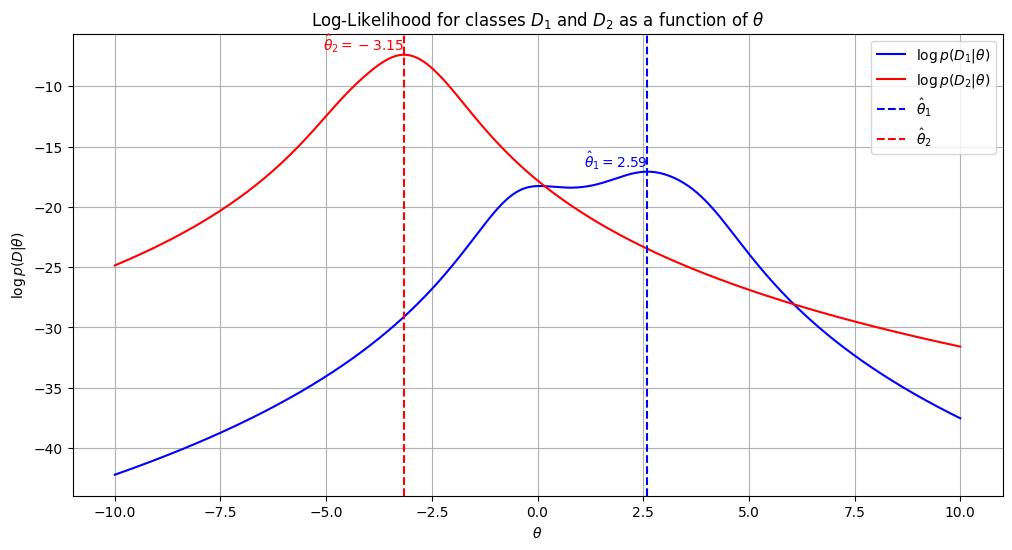

In [128]:
#Plotting the log-likelihoods of the two classes as a function of θ and showing theta1_hat and theta2_hat

plt.figure(figsize = (12, 6))
plt.plot(theta_values, log_p_D1, label=r'$\log p(D_1|\theta)$', color='blue')
plt.plot(theta_values, log_p_D2, label=r'$\log p(D_2|\theta)$', color='red')
plt.axvline(theta1_hat, color='blue', ls='--', label=r'$\hat{\theta}_1$')
plt.axvline(theta2_hat, color='red', ls='--', label=r'$\hat{\theta}_2$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\log p(D|\theta)$')
plt.title('Log-Likelihood for classes $D_1$ and $D_2$ as a function of ' + r'$\theta$')
plt.text(theta1_hat, max(log_p_D1), f'$\hat{{\\theta}}_1 = {theta1_hat:.2f}$',
         color='blue', ha='right', va='bottom')
plt.text(theta2_hat, max(log_p_D2), f'$\hat{{\\theta}}_2 = {theta2_hat:.2f}$',
         color='red', ha='right', va='bottom')
plt.legend()
plt.grid(True)
plt.show()

### Υπολογισμός και plotting της συνάρτησης διάκρισης g(x)

Παρακάτω υπολογίζουμε την συνάρτηση διάκρισης για όλες τις τιμές του δείκτη $x \in D_1 \bigcup D_2$ και δημιουργούμε το αντίστοιχο διάγραμμα. Το όριο απόφασης είναι το $g(x)=0$, δηλαδή όταν οι λογαριθμικές πιθανότητες των δύο κλάσεων είναι ίδιες: $$\log P(x|\hat{\theta}_1) + \log P(\omega_1) = \log P(x|\hat{\theta}_2) + \log P(\omega_2) \space \rightarrow \space P(x|\hat{\theta}_1) \cdot P(\omega_1) = P(x|\hat{\theta}_2) \cdot P(\omega_2) $$ Με βάση τον συγκεκριμένο κανόνα ισχύουν τα εξής:
- Όταν το $g(x)>0$ τότε το δείγμα ταξινομείται στην κλάση $\omega_1$, δηλαδή την κλάση *χωρίς* stress.
- Όταν το $g(x)<0$ τότε το δείγμα ταξινομείται στην κλάση $\omega_2$, δηλαδή την κλάση *με* stress.

 Γενικά, η ταξινόμηση των δεδομένων είναι ικανοποιητική. Η μόνη λάθος ταξινόμηση είναι για το δείγμα με $x=-0.8$ το οποίο ανήκει στην $\omega_1$ αλλά ταξινομείται στην $\omega_2$. Κάτι τέτοιο είναι λογικό καθώς αποτελεί την ακραία κάτω τιμή του $D_1$.

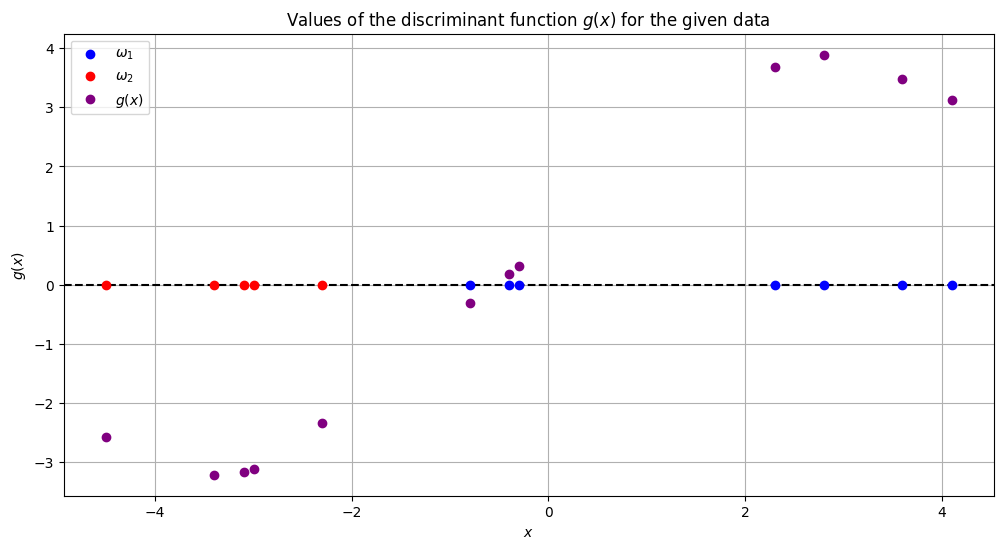

In [129]:
x_values = np.concatenate([D1, D2]) #Concatenating the two datasets into one

prior1, prior2 = classifier.prior_possibility(D1, D2) #Getting the priors
g_x_values = classifier.predict(x_values, prior1, prior2, theta1_hat, theta2_hat)

#Plotting the discriminant function with respect to x_values(the indicators from our experiment)

plt.figure(figsize=(12, 6))
plt.scatter(D1, np.zeros_like(D1), color='blue', label='$\omega_1$', zorder=5)  # ω1
plt.scatter(D2, np.zeros_like(D2), color='red', label='$\omega_2$', zorder=5)  # ω2
plt.plot(x_values, g_x_values, 'o', label=r'$g(x)$', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.title('Values of the discriminant function $g(x)$ for the given data')
plt.legend()
plt.grid(True)
plt.show()

## Μέρος Β


Στο μέρος Β έχουμε τα ίδια δεδομένα με το μέρος Α, όμως αυτήν την φορά πρέπει να τα ταξινομήσουμε με βάση την μέθοδο εκτίμησης κατά Bayes. Γνωρίζουμε πως η συνάρτηση πυκνότητας πιθανότητας(prior) που ακολουθεί η παράμετρος $\theta$ είναι η εξής: $$p(\theta)=\frac{1}{10 \pi} \frac{1}{1+(\frac{\theta}{10})^2}$$
Όπως και στο μέρος Α, η υλοποίηση των ερωτημάτων γίνεται μέσω μια κλάσης, της *BayesClassifier*, η οποία παρουσιάζεται αναλυτικά παρακάτων.  

### Επεξήγηση της κλάσης *BayesClassifier*

Η κλάση *BayesClassifier* έχει ως σκοπό την υλοποίηση των παρακάτω:
- **Prior**, η οποία μας επιστρέφει την συνάρτηση πυκνότητας πιθανότητας που δίνεται στην εκφώνηση του μέρους Β. Αυτή, όπως αναφέρεται και παραπάνω έχει τύπο: $$p(\theta)=\frac{1}{10 \pi} \frac{1}{1+(\frac{\theta}{10})^2}$$
- **Posterior**, δηλαδή την a-posteriori πιθανότητα $p(\theta|D)$. Αυτή θέλουμε να την υπολογίσουμε και να την σχεδιάσουμε για τα σύνολα $D_1$ και $D_2$ και να δούμε την εξάρτηση που έχει από την παράμετρο $\theta$. Η a-posteriori πιθανότητα υπολογίζεται από τον κανόνα του Bayes: $$p(\theta|D)=\frac{p(D|\theta)p(\theta)}{\int p(D|\theta)p(\theta)d\theta}$$
- **Predict**, η οποία μας επιστρεφεί τις τιμές της συνάρτησης διάκρισης για κάθε δείγμα $x \in D_1 \bigcup D_2$. Η συνάρτηση διάκρισης είναι η $$h(x)= \log P(x|D_1) - \log P(x|D2) + \log P(\omega_1) - \log P(\omega_2)$$
Για τον υπολογισμό των $\log P(x|D_1)$ και $\log P(x|D_2)$ γνωρίζουμε από την θεωρία ότι πρέπει να πάρουμε τους ακόλουθους τύπους $$P(x|D_1)= \int P(x|\theta)P(\theta|D_1)d\theta$$ $$P(x|D_2)= \int P(x|\theta)P(\theta|D_2)d\theta$$
Γνωρίζουμε και έχουμε ήδη υπολογίσει τις a-posteriori πιθανότητες $P(\theta|D_1)$ και $P(\theta|D_2)$ στο προηγούμενο υποερώτημα, και έτσι μας μένει ο υπολογισμός της $P(x|\theta)$. Αυτός πρέπει να γίνει $∀ x \in D_1 ⋃ D_2$ και υλοποιείται όπως φαίνεται στον κώδικα.

In [130]:
class BayesClassifier:

  def __init__(self):
    """
    Initializes the BayesClassifier object and creates a LogLikelihoodClassifier
    object.
    """
    self.log_likelihood_classifier = LogLikelihoodClassifier()

  def prior(self, theta):
    """
    @theta: Given theta value
    @return: The prior probability for the given theta based on its probability
    density function
    """
    return 1 / (10 * np.pi * (1 + (theta / 10) ** 2))

  def posterior(self, theta_values, D):
    """
    @D: Given Dataset
    @theta_values: Matrix containing values of theta
    @return: The posterior probability for each theta value
    """
    prior_values = self.prior(theta_values) #Get prior for each theta in theta_values
    likelihood = np.exp([self.log_likelihood_classifier.log_likelihood(D, theta) for theta in theta_values]) #Calculate p(D|Θ)
    numerator = likelihood * prior_values #Calculate p(D|θ)p(θ)
    denominator = np.trapz(numerator, theta_values) #Calculate integral[p(D|θ)p(θ)dΘ]
    return numerator / denominator

  def predict(self, x_values, prior1, prior2, posterior1, posterior2, theta_values):
    """
    @x_values: Matrix containing values of x which is the concat of our initial D1 and D2
    @prior1: Prior possibility of class 1
    @prior2: Prior possibility of class 2
    @posterior1: Posterior possibility of class 1
    @posterior2: Posterior possibility of class 2
    @theta_values: Matrix containing values of theta
    @return: The values of the discriminant function h(x)
    """
    h_values = []
    for x in x_values:
       p_x_given_theta = np.exp([self.log_likelihood_classifier.log_likelihood(np.array([x]), theta) for theta in theta_values]) #p(x|θ)
       p_x_given_D1 = np.trapz(p_x_given_theta * posterior1, theta_values) #p(x|D1) = integral[p(x|θ)p(θ|D1)dθ]
       p_x_given_D2 = np.trapz(p_x_given_theta * posterior2, theta_values) #p(x|D2) = integral[p(x|θ)p(θ|D2)dθ]
       h_x = np.log(p_x_given_D1) - np.log(p_x_given_D2) + np.log(prior1) - np.log(prior2)
       h_values.append(h_x)

    return np.array(h_values)



### Plots των $p(\theta)$, $p(\theta|D_1)$ και $p(\theta|D_2)$


Παρακάτω απεικονίζονται:
- Η συνάρτηση πυκνότητας πιθανότητας(prior) $p(\theta)$.
- Οι εκ των υστέρων πιθανότητες(posterior) $p(\theta|D_1)$ και $p(\theta|D_2)$. Μπορούμε να παρατηρήσουμε πως αυτές συγκεντρώνονται γύρω από τις τιμές της παραμέτρου $\theta$ που μεγιστοποιούν την $p(D|\theta)$, δηλαδή γύρω από τις $\hat{\theta}_1$ και $\hat{\theta}_2$. Επίσης είναι συγκεντρωμένες κοντά στο $0$, το οποίο είναι λογικό λαμβάνοντας υπόψην μας την μορφή της $p(\theta)$. Ακόμα, βλέπουμε πως η $p(\theta|D2)$ είναι πιο "στενή" σε σχέση με την $p(\theta|D1)$. Αυτό σημαίνει πως η εκτίμηση της παραμέτρου $\theta$ είναι πιο βέβαιη στο $D_2$. Κάτι τέτοιο συμβαίνει λόγω της συγκέντρωσης των τιμών του $D_2$ στο $[-4.5, -2.3]$, ενώ στο $D_1$ οι τιμές είναι πιο "απλωμένες" $[-0.8, 4.1]$.

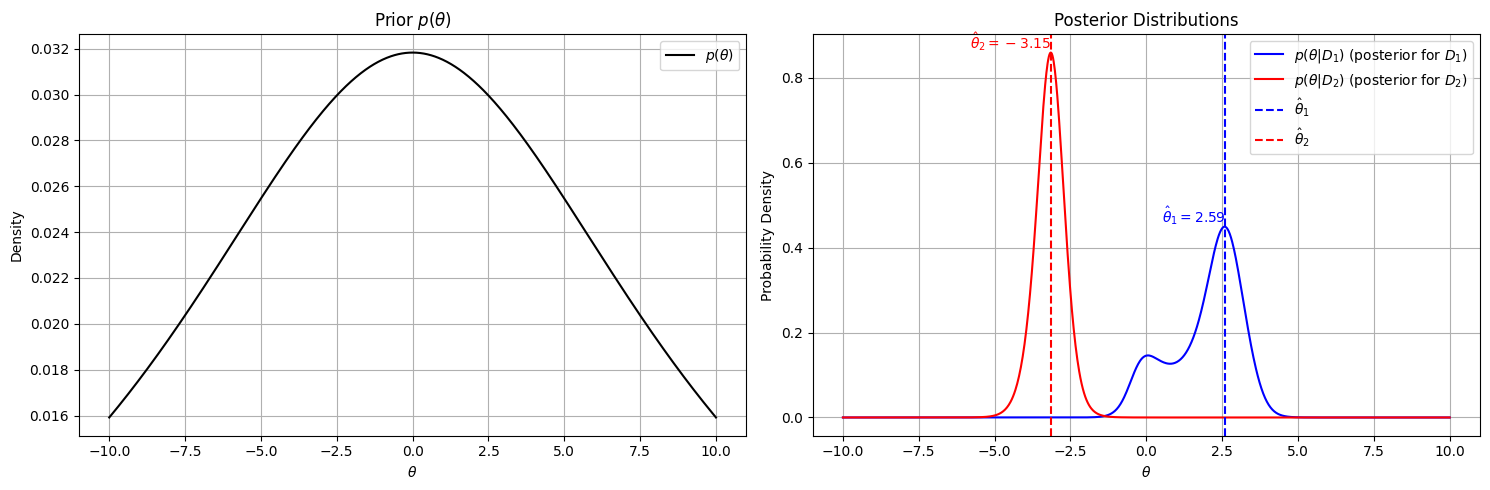

In [131]:
bayes_classifier = BayesClassifier()

posterior_D1 = bayes_classifier.posterior(theta_values, D1)
posterior_D2 = bayes_classifier.posterior(theta_values, D2)

prior_values = bayes_classifier.prior(theta_values)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(theta_values, prior_values, label=r'$p(\theta)$', color='black')
axes[0].set_title('Prior $p(\\theta)$')
axes[0].set_xlabel('$\\theta$')
axes[0].set_ylabel('Density')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(theta_values, posterior_D1, label=r'$p(\theta|D_1)$ (posterior for $D_1$)', color='blue')
axes[1].plot(theta_values, posterior_D2, label=r'$p(\theta|D_2)$ (posterior for $D_2$)', color='red')
axes[1].axvline(theta1_hat, color='blue', ls='--', label=r'$\hat{\theta}_1$')
axes[1].axvline(theta2_hat, color='red', ls='--', label=r'$\hat{\theta}_2$')
axes[1].text(theta1_hat, max(posterior_D1), f'$\hat{{\\theta}}_1 = {theta1_hat:.2f}$',
         color='blue', ha='right', va='bottom')
axes[1].text(theta2_hat, max(posterior_D2), f'$\hat{{\\theta}}_2 = {theta2_hat:.2f}$',
         color='red', ha='right', va='bottom')
axes[1].set_xlabel(r'$\theta$')
axes[1].set_ylabel(r'Probability Density')
axes[1].set_title('Posterior Distributions')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


### Υπολογισμός και plotting της συνάρτησης διάκρισης h(x)


Παρακάτω υπολογίζουμε την συνάρτηση διάκρισης για όλες τις τιμές του δείκτη $x \in D_1 \bigcup D_2$ και δημιουργούμε το αντίστοιχο διάγραμμα. Η συνάρτηση διάκρισης είναι η $$h(x)= \log P(x|D_1) - \log P(x|D2) + \log P(\omega_1) - \log P(\omega_2)$$

Το όριο απόφασης είναι το $h(x)=0.$ Δηλαδή όπως και στο μέρος Α:
- Όταν το $h(x)>0$ τότε το δείγμα ταξινομείται στην κλάση $\omega_1$, δηλαδή την κλάση *χωρίς* stress.
- Όταν το $h(x)<0$ τότε το δείγμα ταξινομείται στην κλάση $\omega_2$, δηλαδή την κλάση *με* stress.

Μπορούμε να παρατηρήσουμε πως τα δεδομένα μας ταξινομούνται με ακρίβεια **100%**. Συνεπώς, η ταξινόμηση με τον *Bayes Classifier* είναι καλύτερη από την ταξινόμηση με τον *Maximum Likelihood Classifier(MLE)*. Αυτό συμβαίνει για τους εξής λόγους:
1. Μέθοδος Μέγιστης Πιθανοφάνειας (MLE):
  - Υποθέτει ότι η παράμετρος $\theta$ είναι σταθερή και ίση με την τιμή που μεγιστοποιεί την $p(D|\theta)$. Στην περίπτωση μας θεωρήσαμε ότι αυτή η τιμή είναι η $\hat{\theta}$.
  - Δεν ενσωματώνει την prior πληροφορία, οπότε είναι πιο ευαίσθητη σε ασυμμετρίες.
2. Μέθοδος κατά Bayes:
  - Χρησιμοποιεί την prior πληροφορία για την παράμετρο $\theta$.
  - Υπολογίζει την posterior $p(\theta|D)$ και ενσωματώνει την αβεβαιότητα της παραμέτρου $\theta$ στις εκτιμήσεις.


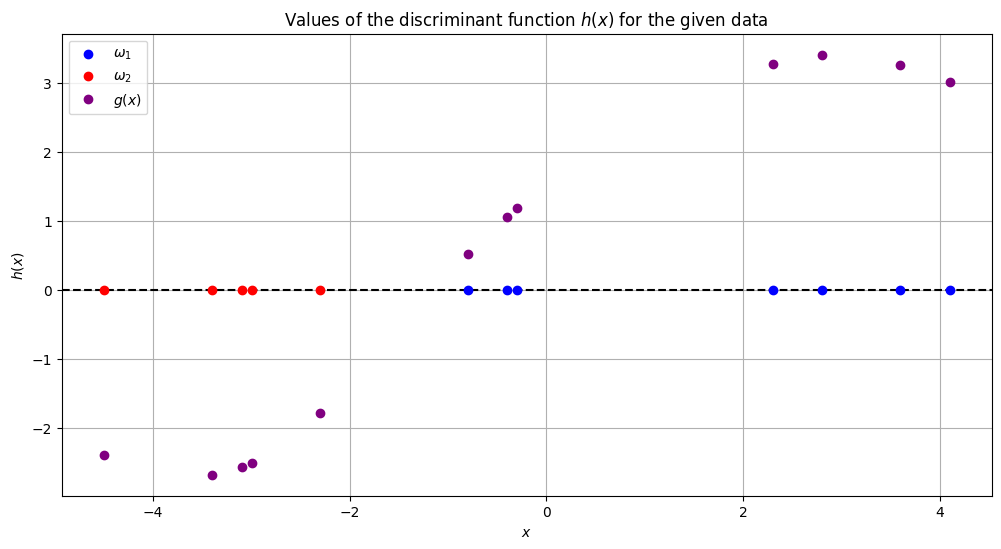

In [132]:
h_x_values = bayes_classifier.predict(x_values, prior1, prior2, posterior_D1, posterior_D2, theta_values)

plt.figure(figsize=(12, 6))
plt.scatter(D1, np.zeros_like(D1), color='blue', label='$\omega_1$', zorder=5)  # ω1
plt.scatter(D2, np.zeros_like(D2), color='red', label='$\omega_2$', zorder=5)  # ω2
plt.plot(x_values, h_x_values, 'o', label=r'$g(x)$', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel(r'$x$')
plt.ylabel(r'$h(x)$')
plt.title('Values of the discriminant function $h(x)$ for the given data')
plt.legend()
plt.grid(True)
plt.show()

## Μέρος Γ



Στο μέρος Γ της εργασίας ζητείται η χρήση της συνάρτησης *load_iris()* η οποία είναι μια συνάρτηση της βιβλιοθήκης *sklearn*. Αυτή περιέχει 150 δείγματα διαφορετικών ειδών από ένα συγκεκριμένο φυτό, της Ίριδας. Τα είδη που περιέχονται είναι τρία, η *Iris Setosa* που αντιστοιχεί στην κλάση 0, η *Iris Versicolor* που αντιστοιχεί στην κλάση 1, και η *Iris Virginica* που αντιστοιχεί στην κλάση 2. Το κάθε ένα από τα 150 δείγματα έχει 4 χαρακτηριστικά, που είναι το μήκος και το πλάτος των σεπάλων και των πετάλων του άνθους. Από αυτά τα 4 χαρακτηριστικά πρέπει να κρατήσουμε τα πρώτα 2 για τα ακόλουθα ερωτήματα.

### 1η Ενότητα

Στην πρώτη ενότητα πρέπει να δημιουργήσουμε ένα *DecisionTreeClassifier* και να το εκπαιδεύσουμε με το 50% τυχαίων δειγμάτων του συνόλου και έπειτα να ταξινομήσουμε το υπόλοιπο 50%. Σκοπός είναι να βρούμε το βέλτιστο βάθος του DTC, δηλαδή το βάθος που δίνει την μεγαλύτερη ακρίβεια ταξινόμησης.

Όπως μπορούμε να παρατηρήσουμε και παρακάτω, το βέλτιστο βάθος του DTC είναι 3 και δίνει ακρίβεια ίση με 0.787. Στο πρώτο διάγραμμα παρουσιάζεται η ακρίβεια ταξινόμησης σε σχέση με τα διαφορετικά βάθη.

Έπειτα εκπαιδεύουμε τον DTC με το βέλτιστο βάθος 3 και απεικονίζουμε τα όρια απόφασης για τον ταξινομητή. Γενικά, τα δείγματα της κλάσης versicolor είναι σχεδόν όλα σωστά ταξινομημένα, ενώ υπάρχει περισσότερη αστοχία στα δείγματα των άλλων δύο κλάσεων.  

Best Tree Depth: 3
Best Accuracy: 0.787


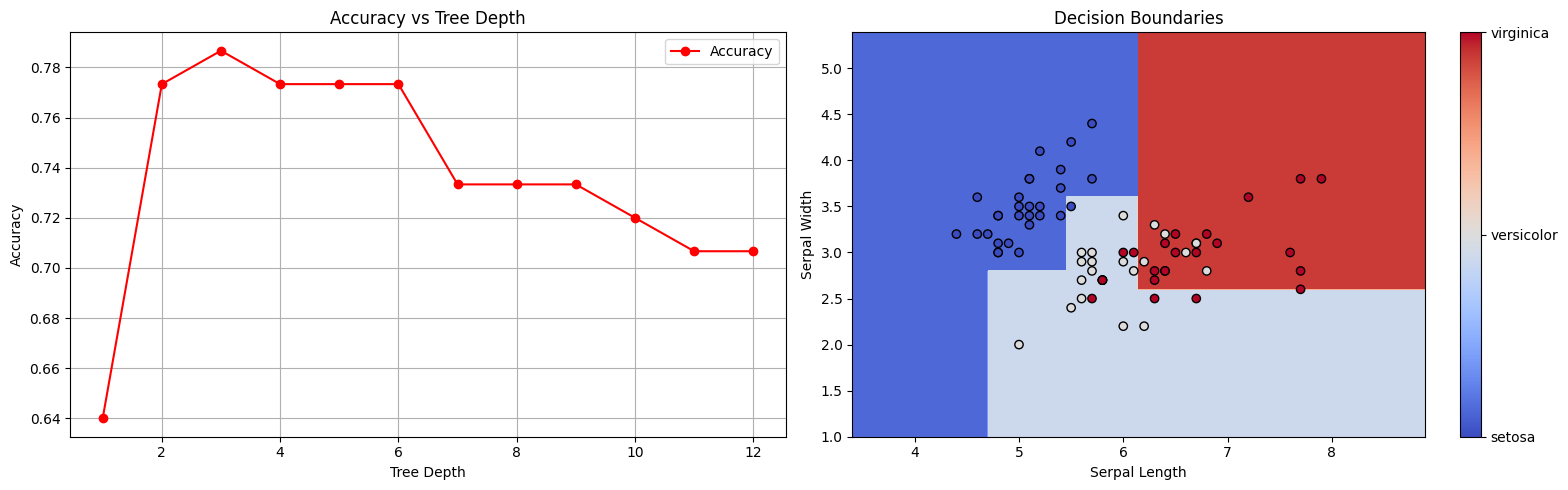

In [133]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data[:, :2] #Get first two cols(serpal length, serpal width) from each row
y = iris.target #iris setosa=0, iris versicolor=1, iris virginica=2
target_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=True) #Split X and y to train and test (50%-50%)


best_tree_depth = 0
best_tree_accuracy = 0
depths = range(1, 13)
accuracies = []

for current_depth in depths:
  clf = DecisionTreeClassifier(max_depth=current_depth, random_state=42)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  if accuracy > best_tree_accuracy:
    best_tree_accuracy = accuracy
    best_tree_depth = current_depth

print(f"Best Tree Depth: {best_tree_depth}")
print(f"Best Accuracy: {best_tree_accuracy:.3f}")


#Train the max accuracy DecisionTree which has depth 3
clf = DecisionTreeClassifier(max_depth=best_tree_depth, random_state=42)
clf.fit(X_train, y_train)

#Get min and max for length(feature 1) and width(feature 2) and add -+1 margins (only use the test samples)
x_min, x_max = X_test[:, 0].min() -1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

"""
@np.meshgrid(x,y)
x = 1D array
y = 1D array
xx,yy = 2D arrays

xx= xmin, xmin+0.01 ... xmax for len(y) rows

yy= ymin         for len(x) cols
    ymin+0.01
    .
    .
    .
    ymax


@ravel() --> make a 2D into 1D array
@np.c[] --> concat two 1D arrays into a 2D array where each row contains a grid coordinate (x,y)
@reshape() --> reshapes the 1D array from clf.predict() back to a 2D array (same dimensions as xx,yy) so we can plot the decision boundaries
"""
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(depths, accuracies, label='Accuracy', color='red', marker='o')
axes[0].set_title('Accuracy vs Tree Depth')
axes[0].set_xlabel('Tree Depth')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

axes[1].contourf(xx, yy, Z, alpha=1, cmap=plt.cm.coolwarm)
cb = axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
cbar = plt.colorbar(cb, ax=axes[1])
cbar.set_ticks(range(0, target_names.shape[0]))
cbar.set_ticklabels(target_names)
axes[1].set_title('Decision Boundaries')
axes[1].set_xlabel('Serpal Length')
axes[1].set_ylabel('Serpal Width')

plt.tight_layout()
plt.show()

### 2η Ενότητα

Στην δεύτερη ενότητα πρέπει να δημιουργήσουμε έναν *RandomForestClassifier* με 100 δέντρα και να χρησιμοποιήσουμε το 50% του προηγούμενου train set για να τον εκπαιδεύσουμε. Σκοπός είναι να βρούμε πάλι το βέλτιστο βάθος δέντρου, δηλαδή το βάθος που δίνει την μεγαλύτερη ακρίβεια ταξινόμησης.

Όπως μπορούμε να παρατηρήσουμε και παρακάτω, το βέλτιστο βάθος του DTC είναι 2 και δίνει ακρίβεια ίση με 0.827. Στο πρώτο διάγραμμα παρουσιάζεται η ακρίβεια ταξινόμησης σε σχέση με τα διαφορετικά βάθη των δέντρων. Μπορούμε να παρατηρήσουμε πως η ακρίβεια του RF είναι μεγαλύτερη από ότι του DTC, με μικρότερο βάθος δέντρων, κάτι το οποίο επιβεβαιώνεται και από τα όρια απόφασης στο δεύτερο διάγραμμα. Αυτό συμβαίνει διότι ο RF χρησιμοποιεί πολλά δέντρα με μικρότερο βάθος (όλα έχουν το ίδιο βάθος, μικρότερο βάθος = πιο "αδύναμα"), τα οποία εκπαιδεύει με διαφορετικά δείγματα και παίρνει μια απόφαση χρησιμοποιώντας την μέθοδο της πλειοψηφίας ψήφων. Με αυτόν τον τρόπο δημιουργείται ένα ισχυρότερο μοντέλο με πιο σύνθετα όρια απόφασης.

Best Depth: 2
Best Accuracy: 0.827


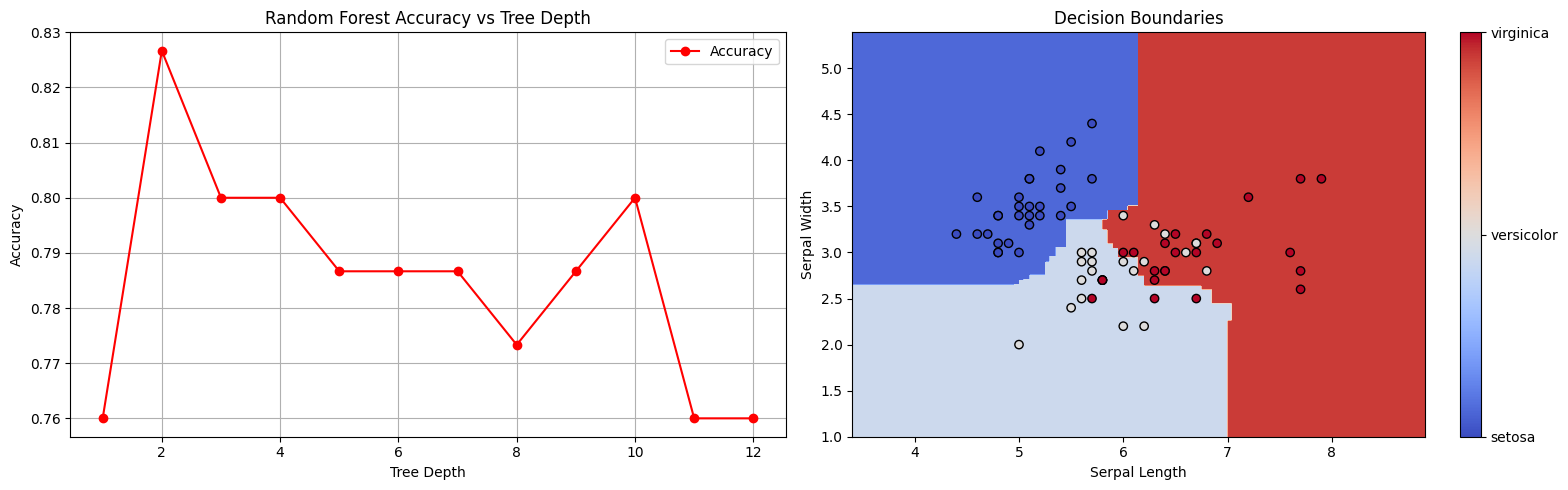

In [134]:
from sklearn.ensemble import RandomForestClassifier

gamma = 0.5
number_of_trees = 100
best_forest_depth = 0
best_forest_accuracy = 0
accuracies = []

for depth in depths:
  rf_clf = RandomForestClassifier(n_estimators=number_of_trees, max_depth=depth,
                                  random_state=42, bootstrap=True, max_samples=gamma)
  rf_clf.fit(X_train, y_train)
  y_pred = rf_clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  if accuracy > best_forest_accuracy:
    best_forest_accuracy = accuracy
    best_forest_depth = depth

print(f"Best Depth: {best_forest_depth}")
print(f"Best Accuracy: {best_forest_accuracy:.3f}")

rf_clf = RandomForestClassifier(n_estimators=number_of_trees, max_depth=best_forest_depth,
                                random_state=42, bootstrap=True, max_samples=gamma)
rf_clf.fit(X_train, y_train)

rf_Z = rf_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(depths, accuracies, label='Accuracy', color='red', marker='o')
axes[0].set_title('Random Forest Accuracy vs Tree Depth')
axes[0].set_xlabel('Tree Depth')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

axes[1].contourf(xx, yy, rf_Z, alpha=1, cmap=plt.cm.coolwarm)
cb = axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
cbar = plt.colorbar(cb, ax=axes[1])
cbar.set_ticks(range(0, target_names.shape[0]))
cbar.set_ticklabels(target_names)
axes[1].set_title('Decision Boundaries')
axes[1].set_xlabel('Serpal Length')
axes[1].set_ylabel('Serpal Width')

plt.tight_layout()
plt.show()

Παρακάτω παρουσιάζεται ένα διάγραμμα που δείχνει την εξάρτηση που έχει η ακρίβεια ταξινόμησης ενός RF κατανομητή με βάθος δέντρων 2 από τον παράγοντα $\gamma$. Αυτός μας δείχνει πόσο "μικρό (ή "μεγάλο") είναι το training set. Για παράδειγμα εάν $\gamma=0.3$, τότε ο RF εκπαιδεύεται χρησιμοποιώντας το 30% των δεδομένων που του παρέχουμε για training.

Μπορούμε να παρατηρήσουμε πως για $\gamma \in [0.1, 0.2]$ η ακρίβεια είναι μικρή, καθώς το μοντέλο χρησιμοποιεί πολύ λίγα δεδομένα για την εκπαίδευση. Καθώς το $\gamma$ μεγαλώνει, αυξάνεται η ακρίβεια, η οποία τελικά σταθεροποιείται για $\gamma=0.4$ με ακρίβεια περίπου ίση με 0.83. Αυτό σημαίνει πως το μοντέλο μας έχει φτάσει την μέγιστη απόδοση του και δεν κερδίζουμε σε ακρίβεια εάν του δώσουμε περισσότερα δεδομένα εκπαίδευση.

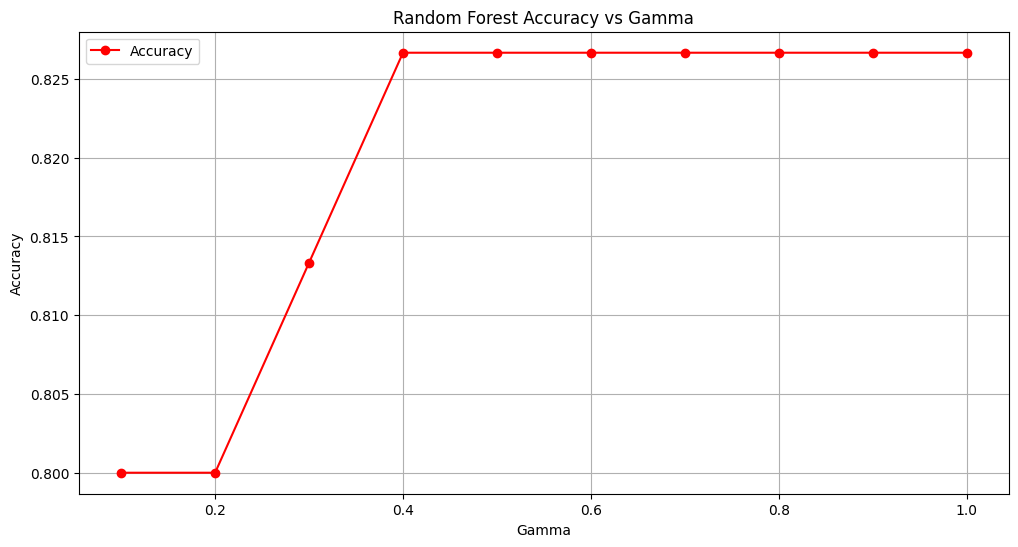

In [135]:
gamma = np.linspace(0.1, 1, 10)
accuracies = []

for curr_gamma in gamma:
  clf = RandomForestClassifier(n_estimators=number_of_trees, max_depth=best_forest_depth,
                               random_state=42, bootstrap=True, max_samples=curr_gamma)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)

plt.figure(figsize=(12, 6))
plt.plot(gamma, accuracies, label='Accuracy', color='red', marker='o')
plt.title('Random Forest Accuracy vs Gamma')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()